# Importing Necessary Libraries

In [1]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)
logging.info("We are importing required library & zomato.csv file")

In [2]:
import pandas as pd                     # Data Manipulation
import numpy as np                      # Numerical Calculation
from matplotlib import pyplot as plt    # Data Visualization
import seaborn as sns                   
%matplotlib inline
sns.set()                               # setting styles of the plot to seaborn

# hiding the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [3]:
zomato_df = pd.read_csv("zomato.csv")
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
logging.info("Starting the Exploratory Data Analysis in Colab Notebook")

## Checking the Size of the Dataset

In [5]:
zomato_df.shape

(51717, 17)

In [6]:
zomato_df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [7]:
# Renaming the columns listed_in(city) 
zomato_df.rename(columns = {'listed_in(city)' : 'city', 'approx_cost(for two people)' : 'approx_cost'}, inplace = True)

## Data Cleaning

### Cleaning te data by dropping the unnecessary columns, handling the null values, columns having wrong datatypes etc.

## Dropping the Columns which are of no use

In [8]:
zomato_df.drop(['url', 'address', 'phone', 'dish_liked', 'menu_item', 'listed_in(type)', 'reviews_list'], axis = 1, inplace = True)

In [9]:
zomato_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari


## Checking and Handling the Datatypes

In [10]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   city          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


We can clearly see that rate, location, rest_type, cuisines, approx_cost either have null values or incorrect datatypes or both.

### Rate Column

In [11]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### We conclude that rate contains null as well as garbage values

### Replacing all the null values and garbage values and convert it into int datatype

In [12]:
zomato_df['rate'] = zomato_df['rate'].str.replace("/5", "")
zomato_df['rate'] = zomato_df['rate'].str.replace("nan", "NaN")
zomato_df['rate'] = zomato_df['rate'].str.replace("NEW", "NaN")
zomato_df['rate'] = zomato_df['rate'].str.replace("-", "NaN")
zomato_df['rate'] = zomato_df['rate'].str.replace("/5", "")
zomato_df['rate'] = zomato_df['rate'].fillna(np.nan)
zomato_df['rate'] = zomato_df['rate'].str.replace(" ", "")

In [13]:
zomato_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [14]:
# 
zomato_df['rate'] = zomato_df['rate'].astype(float)

In [15]:
zomato_df['rate'].dtype

dtype('float64')

### Approx Cost Column

In [16]:
zomato_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [17]:
zomato_df['approx_cost'] = zomato_df['approx_cost'].str.replace(",", "")
zomato_df['approx_cost'] = zomato_df['approx_cost'].str.replace("nan", "NaN")
zomato_df['approx_cost'] = zomato_df['approx_cost'].fillna('NaN')
zomato_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
zomato_df['approx_cost'] = zomato_df['approx_cost'].astype(float)

In [19]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   city          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Checking for Null Values

In [20]:
zomato_df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
city                0
dtype: int64

In [21]:
# percentage of null values at each column
(zomato_df.isna().sum() / zomato_df.shape[0]) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
city             0.000000
dtype: float64

In [22]:
zomato_df = zomato_df[zomato_df['location'].notna()]
zomato_df = zomato_df[zomato_df['rest_type'].notna()]
zomato_df = zomato_df[zomato_df['cuisines'].notna()]
zomato_df = zomato_df[zomato_df['approx_cost'].notna()]

# verifying the results
zomato_df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
city               0
dtype: int64

In [23]:
# null values in rate column

zomato_df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [24]:
# for imputing values we ill check for outliers
q1 = zomato_df['rate'].quantile(0.25)
q3 = zomato_df['rate'].quantile(0.75)

iqr = q3 - q1

lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

outliers = len(zomato_df[(zomato_df['rate'] < lower_range) | (zomato_df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


## Median

In [25]:
zomato_df['rate'] = zomato_df['rate'].fillna(zomato_df['rate'].median())

# verifying the results
zomato_df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
city            0
dtype: int64

In [26]:
# resetting the index after dropping the values

zomato_df.reset_index(inplace = True)
zomato_df.drop(['index'], axis=1, inplace=True)

# Data Visualization

Visualizing our data based on different parameters to understand the realtions and some insights from the dataset

## No. of Orders VS Restraunts

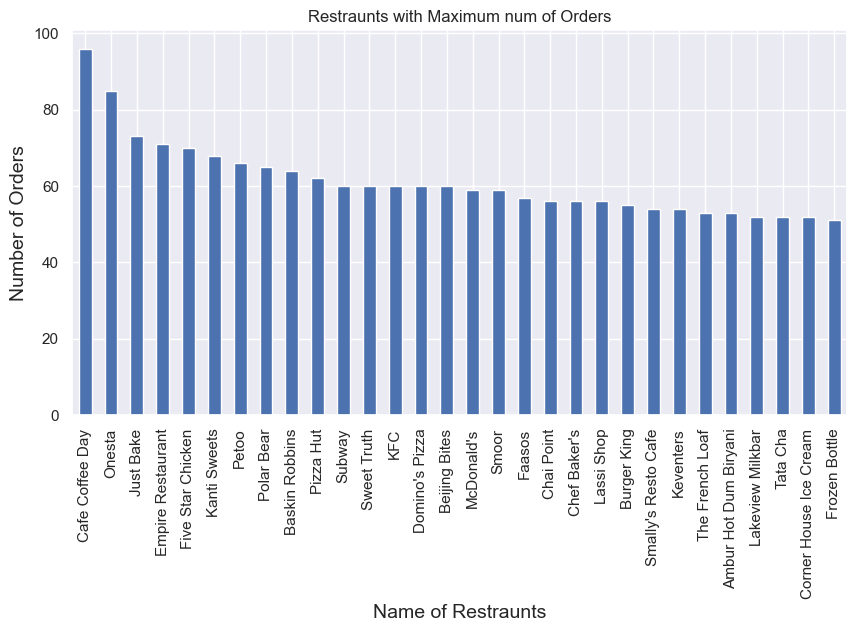

In [27]:
# Checking which restraunts got higher number of orders

plt.figure(figsize = (10, 5))
data = zomato_df['name'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('Name of Restraunts', size = 14)
plt.ylabel('Number of Orders', size = 14)
plt.title("Restraunts with Maximum num of Orders")
plt.show()

## Online orders fecility

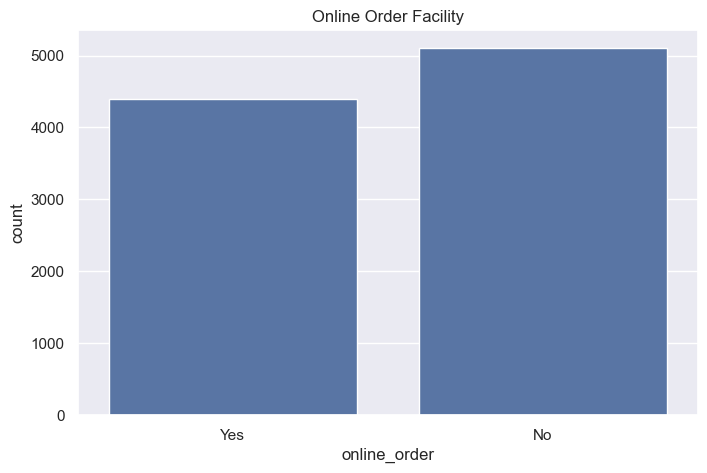

In [28]:
data = zomato_df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x = "online_order", data = data).set_title("Online Order Facility")
plt.show()

## Prebooking Facility

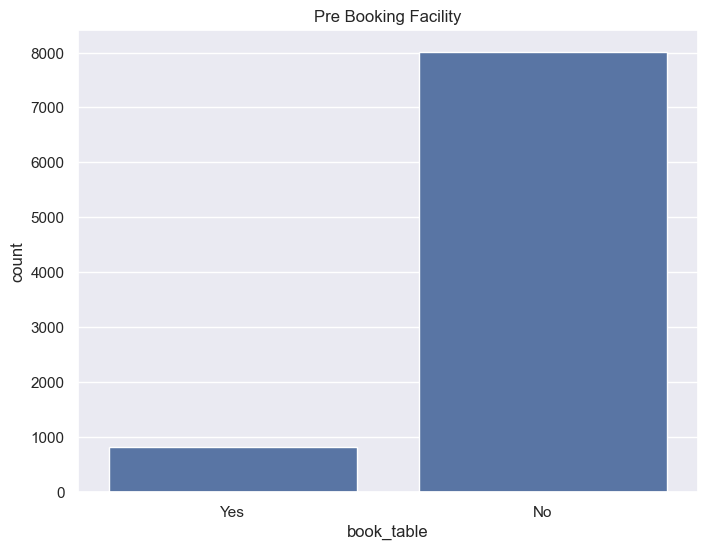

In [29]:
data = zomato_df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'book_table', data = data).set_title('Pre Booking Facility')
plt.show()

## Locations with Higher number of Orders

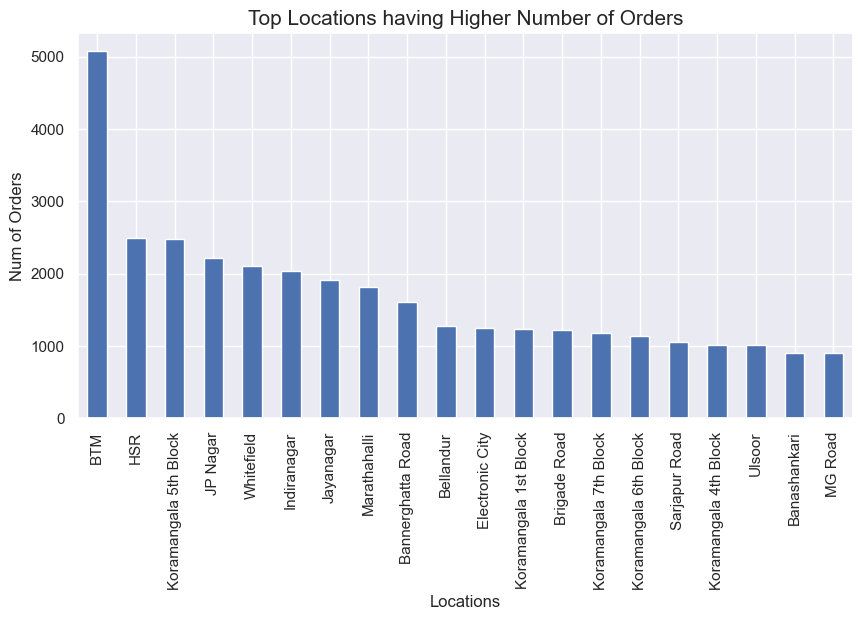

In [30]:
plt.figure(figsize = (10,5))
data = zomato_df.location.value_counts()[0:20]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('Num of Orders')
plt.title("Top Locations having Higher Number of Orders", size = 15)
plt.show()

## Most Common Ratings of Orders

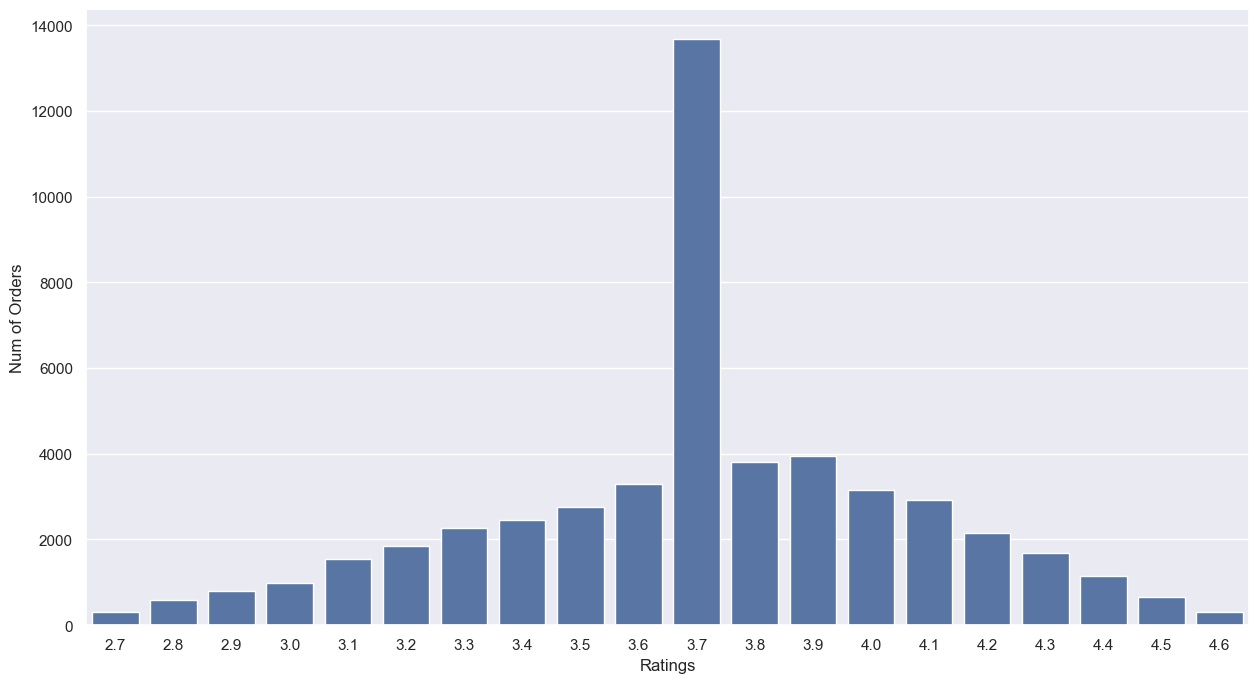

In [31]:
data = zomato_df.rate.value_counts().reset_index()[0:20]
data.columns = ['rate', 'count']  # Rename columns for clarity

plt.figure(figsize=(15,8))
sns.barplot(x=data['rate'], y=data['count'])
plt.xlabel('Ratings')
plt.ylabel('Num of Orders')
plt.show()


## Approximate cost of the mean for two people

In [32]:
data = pd.DataFrame(zomato_df['approx_cost'].value_counts().reset_index()[:20])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')

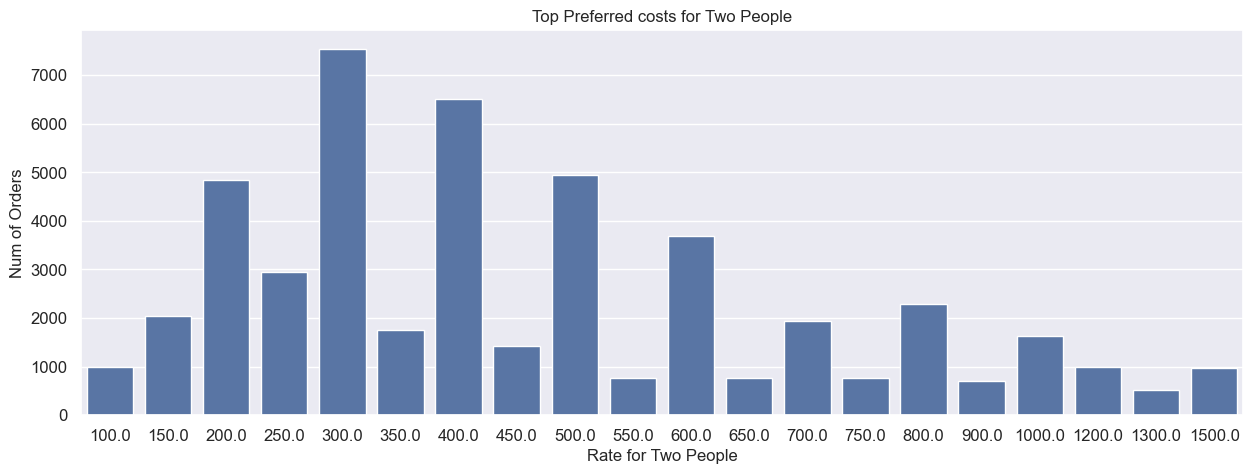

In [33]:
plt.figure(figsize = (15,5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two People')
plt.ylabel('Num of Orders')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Top Preferred costs for Two People')
plt.show()

## Restraunt Type vs No. of Orders

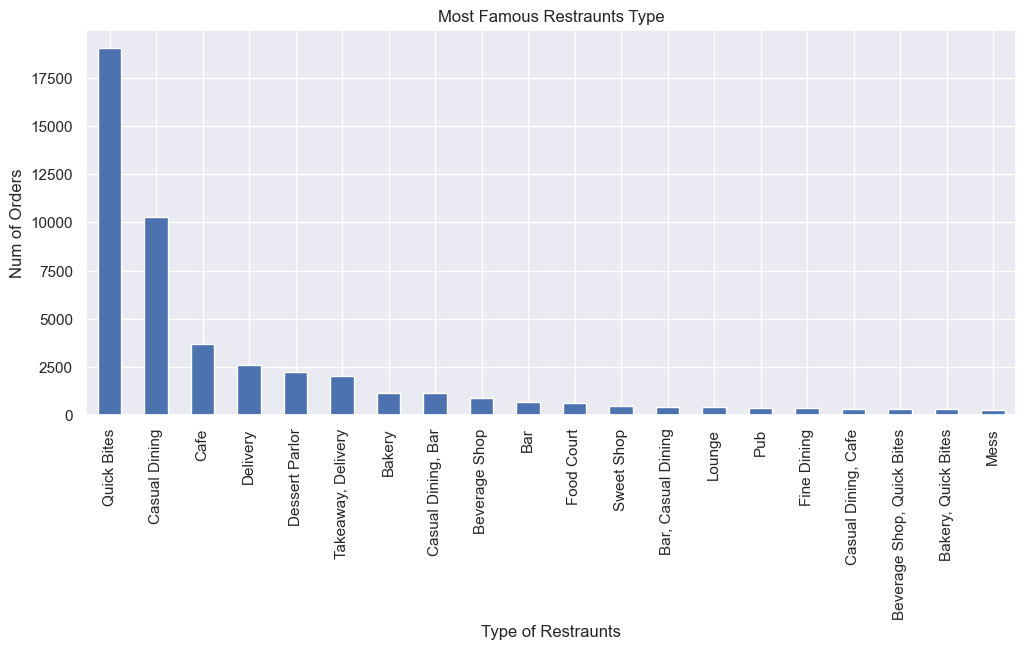

In [34]:
plt.figure(figsize = (12,5)) 
ax = zomato_df.rest_type.value_counts()[:20]
ax.plot(kind='bar')
plt.xlabel('Type of Restraunts')
plt.ylabel('Num of Orders')
plt.title('Most Famous Restraunts Type')
plt.show()

## Most Famous Cuisines among People

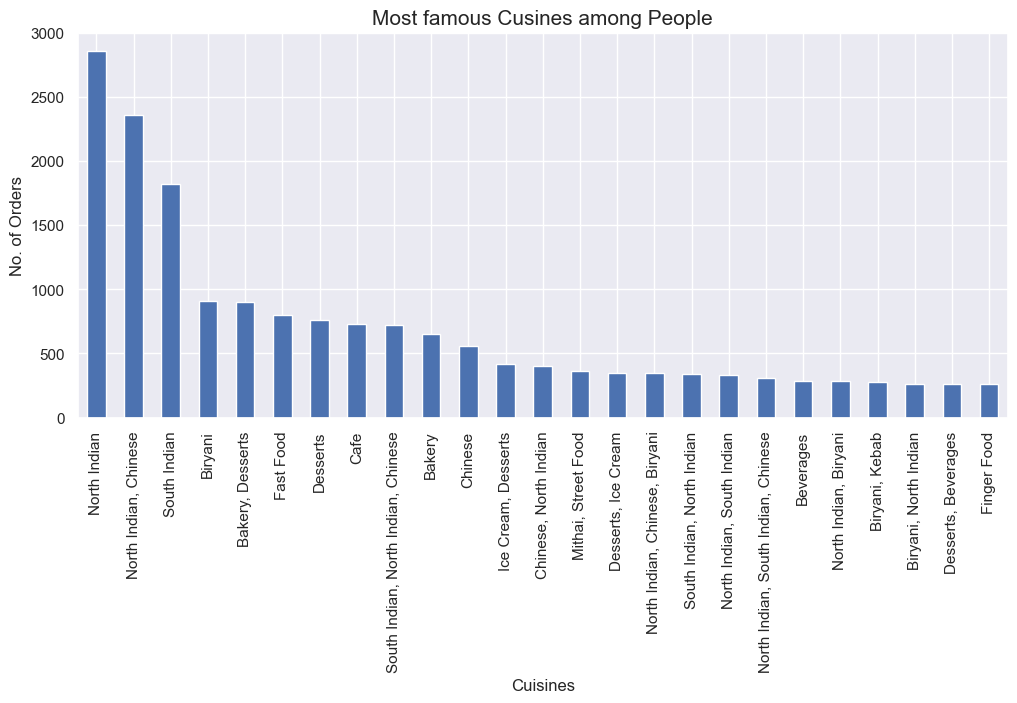

In [35]:
plt.figure(figsize=(12,5))
ax = zomato_df.cuisines.value_counts()[:25].plot(kind='bar')
plt.title("Most famous Cusines among People",fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel ("No. of Orders")
plt.show()

## Top Loactions with Most Number of Restraunts

In [36]:
top_areas = pd.DataFrame(zomato_df.groupby(by='location')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

## Top Areas/ City with Most Number of Restaurants

In [37]:
top_areas = pd.DataFrame(zomato_df.groupby(by='city')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

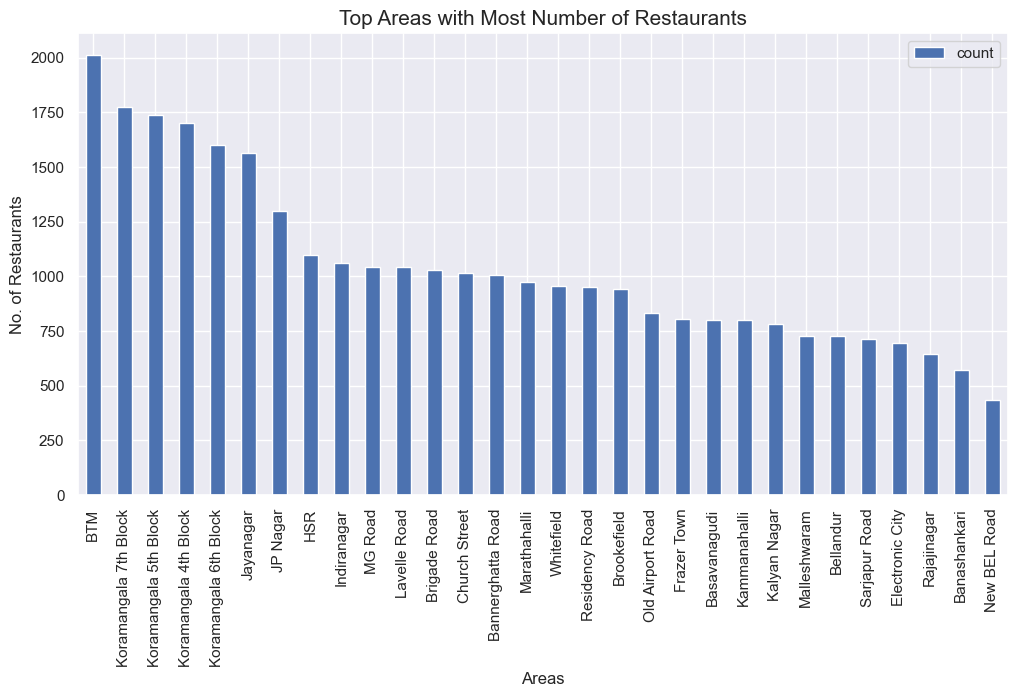

In [38]:
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Areas', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Areas with Most Number of Restaurants', size = 15)
plt.show()

In [39]:
logging.info('Starting Data Preprocessing and Feature Engineering')

# Encoding of Columns

## Online Order Column

In [40]:
zomato_df['online_order'] = zomato_df['online_order'].replace({"Yes" : 1, "No" : 0})
zomato_df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari


#### Book Table Column

In [41]:
zomato_df['book_table'] = zomato_df['book_table'].replace({"Yes" : 1, "No" : 0})
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


## Restraunt Type Column

In [42]:
rest_df = pd.DataFrame(zomato_df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)

rest_df.head()

,rest_type,Fine Dining,Irani Cafee,Lounge,Food Court,Takeaway,Pub,Bakery,Club,Microbrewery,...,Bar,Sweet Shop,Confectionery,Pop Up,Beverage Shop,Casual Dining,Bhojanalya,Meat Shop,Quick Bites,Dessert Parlor
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)
    count += 1

In [44]:
rest_df.head()

,rest_type,Fine Dining,Irani Cafee,Lounge,Food Court,Takeaway,Pub,Bakery,Club,Microbrewery,...,Bar,Sweet Shop,Confectionery,Pop Up,Beverage Shop,Casual Dining,Bhojanalya,Meat Shop,Quick Bites,Dessert Parlor
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
rest_df.drop(['rest_type'], axis = 1, inplace = True)
rest_df.head()

,Fine Dining,Irani Cafee,Lounge,Food Court,Takeaway,Pub,Bakery,Club,Microbrewery,Delivery,...,Bar,Sweet Shop,Confectionery,Pop Up,Beverage Shop,Casual Dining,Bhojanalya,Meat Shop,Quick Bites,Dessert Parlor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Cuisine Column

In [46]:
cuisines_df = pd.DataFrame(zomato_df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe")
unique_cuisines.remove("Bakery")

for cs in unique_cuisines:
    cuisines_df[cs] = 0

cuisines_df.head()

,cuisines,Mongolian,Coffee,Cantonese,Mediterranean,Mughlai,African,Middle Eastern,Greek,French,...,Indian,Sushi,Iranian,Afghani,Bengali,Nepalese,Australian,Momos,European,Chettinad
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
corrected_cuisines = []

for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe")
    if "Bakery" in i:
        i.remove("Bakery")

    corrected_cuisines.append(list(set(i)))

In [48]:
count = 0
for i in corrected_cuisines:
    cuisines_df.loc[count, i] = int(1)
    count += 1

In [49]:
cuisines_df.head()

,cuisines,Mongolian,Coffee,Cantonese,Mediterranean,Mughlai,African,Middle Eastern,Greek,French,...,Indian,Sushi,Iranian,Afghani,Bengali,Nepalese,Australian,Momos,European,Chettinad
0,"North Indian, Mughlai, Chinese",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Mongolian,Coffee,Cantonese,Mediterranean,Mughlai,African,Middle Eastern,Greek,French,Kebab,...,Indian,Sushi,Iranian,Afghani,Bengali,Nepalese,Australian,Momos,European,Chettinad
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Location Column

In [51]:
print(zomato_df['location'].dtype)

zomato_df['location'] = zomato_df['location'].astype(str)

# Apply pd.get_dummies to the 'location' column
location_df = pd.get_dummies(zomato_df['location'])

# Convert boolean values to integers
location_df = location_df.astype(int)

object


In [52]:
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## City Column

In [53]:
print(zomato_df['city'].dtype)

zomato_df['city'] = zomato_df['city'].astype(str)

# Apply pd.get_dummies to the 'location' column
city_df = pd.get_dummies(zomato_df['city'])

# Convert boolean values to integers
city_df = city_df.astype(int)

object


In [54]:
city_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data_with_location = pd.concat([zomato_df, rest_df, cuisines_df, location_df], axis = 1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_with_area = pd.concat([zomato_df, rest_df, cuisines_df, city_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'city'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'city'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


# Feartue Selection

In [58]:
X1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values

print("X = ", X1)
print()
print("y = ", y1)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   1. 236. ...   0.   0.   0.]
 [  0.   0.  13. ...   0.   0.   0.]]

y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [59]:
X2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values

print("X = ", X2)
print()
print("y = ", y2)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   1. 236. ...   0.   0.   1.]
 [  0.   0.  13. ...   0.   0.   1.]]

y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [60]:
from sklearn.ensemble import ExtraTreesRegressor

In [61]:
# Extracting Important Features using ExtraTreesRegressor
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(X1, y1)

# Print feature importances
print("Feature importances: ", imp_features1.feature_importances_)

Feature importances:  [ 1.72591851e-02  1.63673586e-01  2.92313420e-01  4.74832930e-02
  5.70795265e-04  1.55749138e-06  3.17875639e-03  3.55108134e-03
  3.07022222e-03  1.81145414e-03  3.06822477e-03  6.93401615e-05
  9.01605437e-04  5.44820775e-03  1.89554063e-04  3.72365330e-04
  1.22588329e-02  9.36032131e-04  9.31173728e-05  2.67500781e-03
  7.33722035e-04  1.04470795e-05  1.50337964e-16  1.26939792e-03
  1.03308062e-02  7.28589710e-07  6.13996330e-06  1.01601017e-02
  3.48366980e-03  3.22011790e-05  3.05660329e-04  7.53256054e-06
  1.60440291e-03  4.58848406e-03  3.04425663e-04  3.78485689e-04
  2.10649645e-05  3.62422621e-04  2.53560604e-03  2.03450743e-05
  3.82645800e-03  1.41532184e-03  1.03678396e-04  2.57082481e-04
  1.19734018e-04  1.73514437e-03  1.48093203e-03  9.23755895e-04
  2.81931137e-03  1.31045738e-06  7.70032589e-04  5.55134433e-04
  3.26509373e-03  6.68146101e-03  5.46124377e-03  2.82711811e-04
  3.95885430e-03  1.67347526e-03  1.76391456e-02  6.15612492e-03
  8

<Axes: >

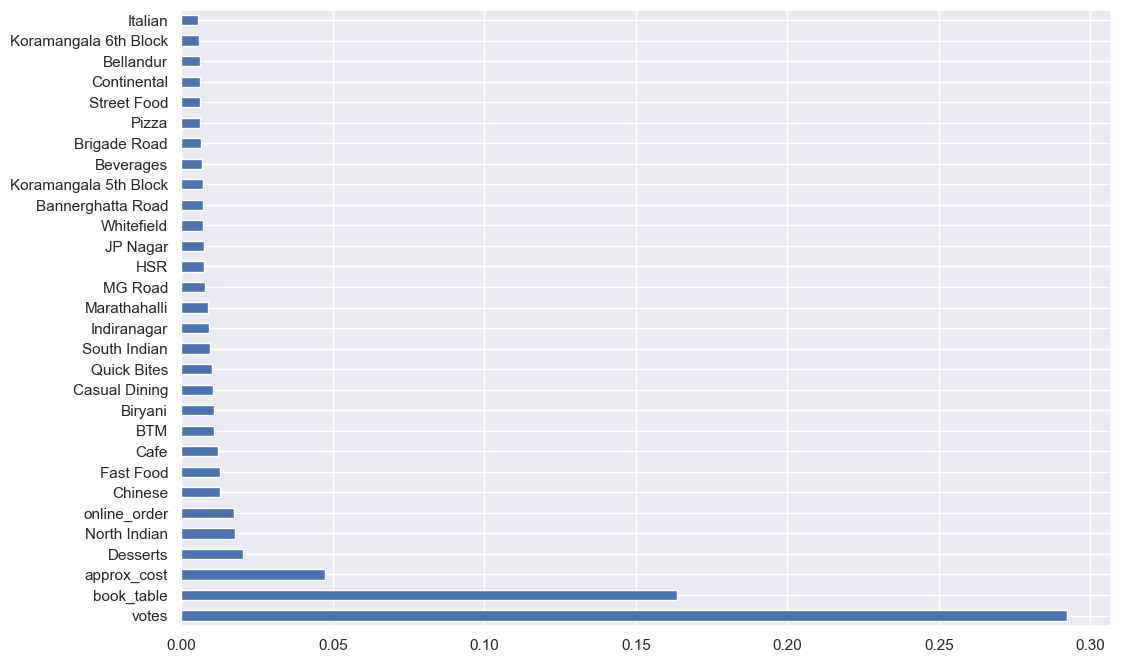

In [62]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

In [63]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(X2, y2)
print(imp_features2.feature_importances_)

[ 2.14301456e-02  1.67362257e-01  3.20572982e-01  7.14590985e-02
  7.88540174e-04  2.14466626e-06  4.09628767e-03  3.73974182e-03
  3.82911773e-03  2.78330859e-03  4.32920633e-03  8.15075060e-05
  9.09848945e-04  6.56483588e-03  2.01740580e-04  4.90233676e-04
  1.40381718e-02  1.28532694e-03  2.15613176e-04  3.55821077e-03
  9.65196814e-04  1.56409146e-05  1.27792528e-17  1.62494566e-03
  1.20716114e-02  7.09367986e-07  1.19031544e-05  1.21992775e-02
  3.56280897e-03  4.35249287e-05  4.29136092e-04  9.18234039e-06
  1.71177892e-03  6.82699657e-03  4.26363108e-04  5.10481155e-04
  5.96243232e-05  3.22104847e-04  3.56909376e-03  2.57538878e-05
  5.48088476e-03  2.13148872e-03  1.45566836e-04  4.33453508e-04
  1.60567707e-04  2.83569396e-03  1.95402769e-03  1.29302849e-03
  3.56875087e-03  1.26590946e-06  8.77835110e-04  6.94121855e-04
  3.43337020e-03  9.02495934e-03  6.53214139e-03  2.87857267e-04
  5.29278023e-03  2.21595747e-03  1.72344743e-02  9.15874644e-03
  1.52698182e-06  1.29293

<Axes: >

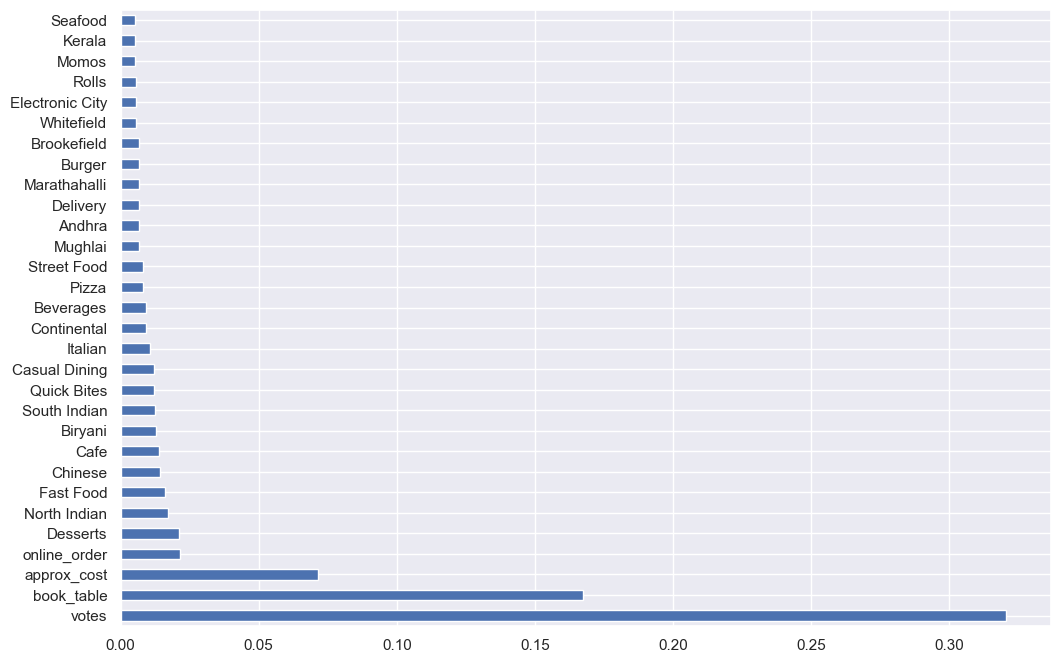

In [64]:
plt.figure(figsize = (12, 8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

In [65]:
logging.info('Model Building and Evaluation')

## Train Test Splitting of Data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 5)

In [68]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 9)

# Importing ML Models

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Linear Regression

## - For data with location


In [70]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

LinearRegression()

In [71]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:100]

array([3.73141124, 3.75750503, 3.53177449, 3.28331288, 3.81463982,
       3.97445435, 3.74323382, 3.63556053, 3.50299947, 3.45789584,
       3.62547923, 4.03186155, 3.56449653, 3.64229061, 3.27389772,
       3.79523065, 3.56093231, 3.67806253, 3.59464142, 3.68308773,
       3.72710754, 3.58135972, 3.65293432, 3.53614548, 4.18186262,
       4.15763988, 3.58649113, 3.62325878, 3.65969469, 3.50048244,
       3.45176396, 3.61094555, 3.57531982, 3.62651944, 3.54130666,
       3.44244389, 3.63385208, 3.61883049, 3.72278457, 3.52043862,
       3.53264678, 3.61505063, 3.55267478, 3.41232758, 3.50620314,
       3.51197499, 3.84381349, 3.60152793, 3.72599839, 3.57872786,
       3.55364458, 3.6817879 , 3.58997575, 3.68002163, 3.83034132,
       3.4784979 , 3.51686074, 3.69134095, 3.69414721, 3.46981152,
       3.91928074, 3.55737828, 3.56586541, 3.34711637, 3.66763353,
       3.51443502, 3.97569785, 3.59345164, 3.50320857, 3.58617402,
       3.83990308, 3.52754092, 3.796642  , 3.50944431, 3.81549

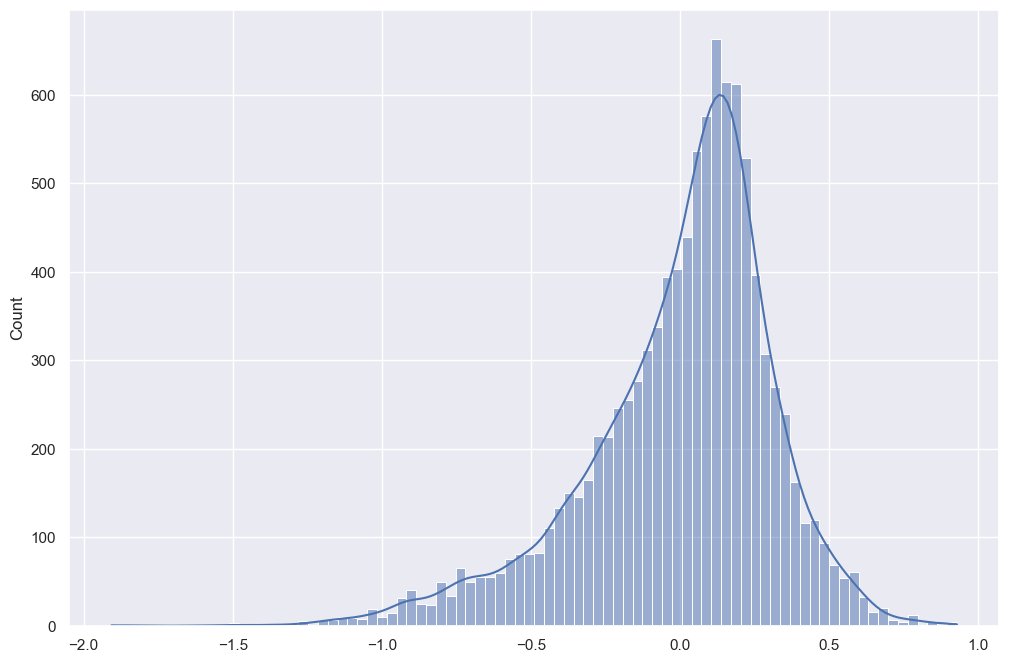

In [72]:
plt.figure(figsize=(12,8))
sns.histplot(y1_test - Y_lr1, kde=True)
plt.show()

## - For Data with Area

In [73]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [74]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:100]

array([3.61432815, 3.45221729, 3.67944749, 3.70539774, 3.57164144,
       3.64387695, 4.36307356, 3.60540836, 3.5730635 , 3.65680962,
       3.59261623, 3.60604091, 3.63974931, 3.57160523, 3.5050777 ,
       3.65160927, 3.46635159, 3.63615162, 3.47490141, 4.0518005 ,
       3.64081239, 3.78491044, 3.43830207, 3.56550631, 3.44054787,
       3.64269155, 3.62524357, 4.04375127, 3.59371536, 3.607716  ,
       3.61363736, 3.38722482, 4.36621677, 3.69303165, 3.64615253,
       3.90537981, 3.43395792, 3.64381771, 3.58523197, 3.56638867,
       3.52980878, 3.57701717, 3.55969373, 3.46665186, 4.55208433,
       3.88991737, 4.03036412, 3.9087739 , 3.61606819, 3.87101257,
       3.76902294, 3.57182463, 3.69765432, 3.54575377, 3.74109461,
       3.63220411, 3.54247355, 3.5387581 , 3.82306491, 3.42946155,
       3.6181196 , 3.62846333, 3.42499895, 3.66331438, 3.57909239,
       3.45993065, 3.67494265, 4.04418175, 3.69078716, 3.48516498,
       3.49268363, 3.66997078, 3.55392023, 3.58575998, 3.64045

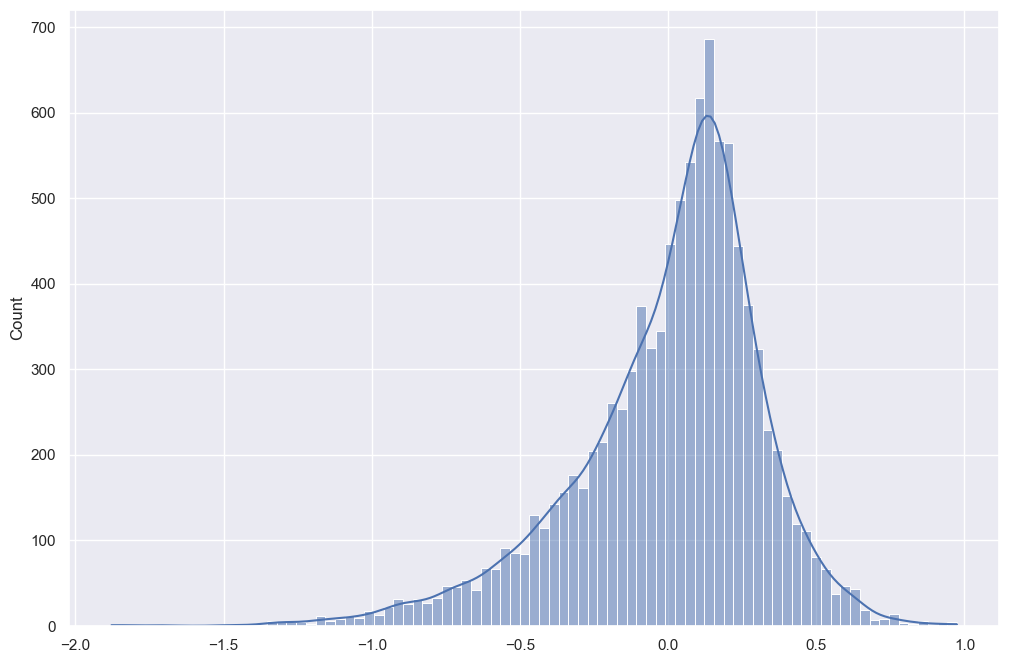

In [75]:
plt.figure(figsize=(12,8))
sns.histplot(y2_test - Y_lr2, kde=True)
plt.show()

## Random Forest Regression

## - For data_with location

In [76]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, y1_train)

RandomForestRegressor()

In [77]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.8       , 3.9       , 3.396     , 3.3       , 3.2       ,
       4.219     , 3.7       , 3.7       , 3.7       , 3.59594048,
       3.6675254 , 4.        , 3.7945    , 3.7       , 3.066     ,
       3.9       , 3.7       , 3.695     , 3.6       , 3.67149563,
       2.624     , 3.7       , 3.3       , 3.53583333, 4.694     ,
       4.1       , 3.7       , 4.096     , 3.75155079, 3.126     ,
       3.277     , 3.668     , 3.7       , 3.355     , 3.114     ,
       3.85242857, 3.73      , 4.04957143, 3.7       , 3.7       ,
       3.5       , 3.284     , 3.4       , 3.4634    , 3.1       ,
       3.7       , 4.017     , 3.214     , 3.797     , 3.619     ,
       3.047     , 3.7535    , 3.474     , 3.3244619 , 4.063     ,
       3.7       , 3.70975   , 3.992     , 3.9       , 3.556     ,
       3.843     , 3.70983333, 3.5       , 2.87440833, 3.4       ,
       3.496     , 4.        , 3.8       , 3.726     , 3.7       ,
       2.757     , 3.7826    , 4.294     , 3.698     , 3.7    

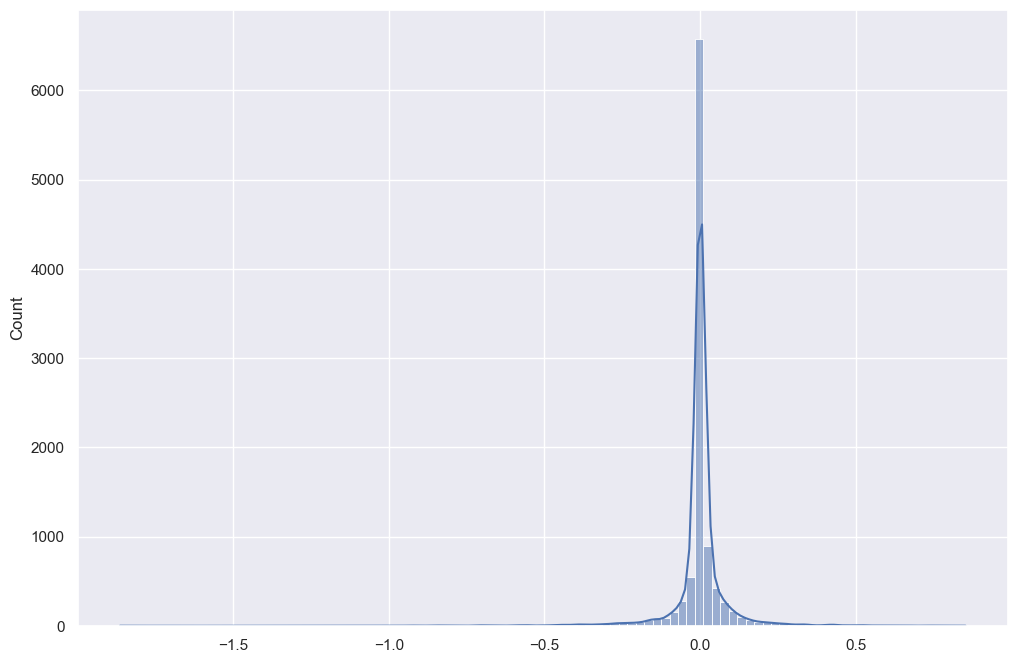

In [78]:
plt.figure(figsize=(12,8))
sns.histplot(y1_test - Y_rf1, kde=True, bins=100)
plt.show()

## - for data with area

In [79]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, y2_train)

RandomForestRegressor()

In [80]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.579     , 3.7       , 3.992     , 3.1565    , 3.325     ,
       3.7       , 4.51      , 2.982     , 3.95961667, 3.062     ,
       3.54      , 3.7       , 3.505     , 3.602     , 3.7       ,
       3.504     , 3.354     , 3.484     , 3.42      , 4.194     ,
       3.824     , 3.906     , 3.7       , 3.7       , 3.206     ,
       3.56133333, 3.586     , 4.001     , 3.9       , 3.7       ,
       3.324     , 3.53      , 4.195     , 3.691     , 3.215     ,
       4.396     , 3.481     , 3.576     , 3.39      , 3.39766667,
       3.675     , 2.976     , 3.648     , 3.7       , 4.4       ,
       3.7       , 3.7       , 3.725     , 3.099     , 3.982     ,
       3.883     , 3.4       , 3.61      , 3.7       , 4.067     ,
       3.585     , 3.42      , 3.7       , 3.475     , 3.28      ,
       3.346     , 3.565     , 3.17      , 3.4275    , 3.7       ,
       3.528     , 3.7       , 4.37      , 3.7955    , 3.33975   ,
       3.7       , 3.7       , 3.777     , 3.7       , 2.82   

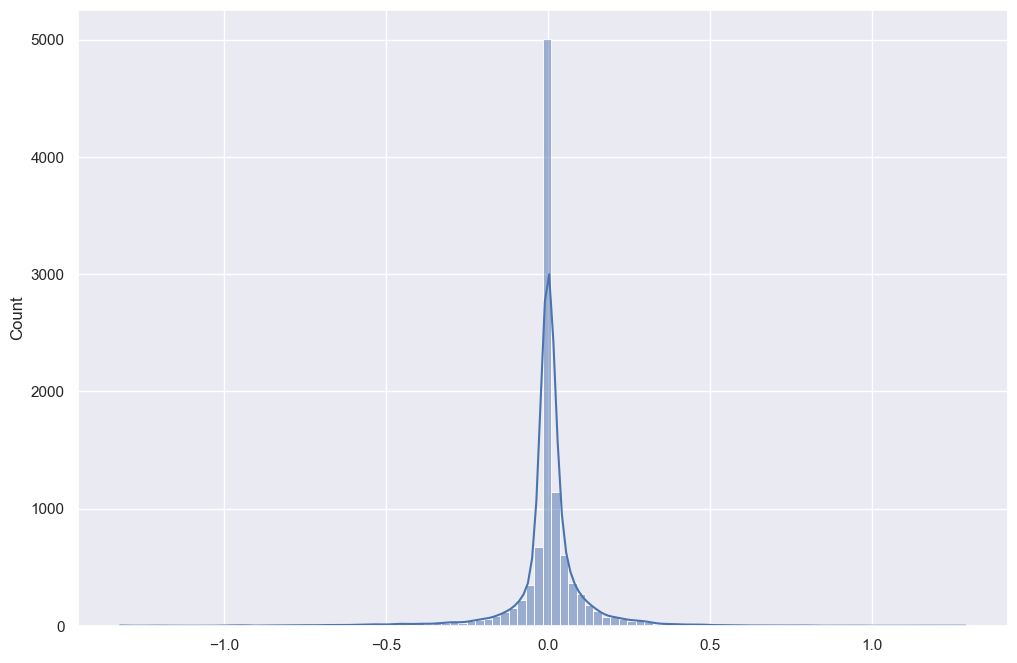

In [81]:
plt.figure(figsize=(12,8))
sns.histplot(y2_test - Y_rf2, kde=True, bins=100)
plt.show()

## Decision Tree Regressor

## - for data with location

In [82]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [83]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.8       , 3.9       , 3.4       , 3.3       , 3.2       ,
       4.2       , 3.7       , 3.7       , 3.7       , 3.7       ,
       3.6       , 4.        , 3.8       , 3.7       , 3.        ,
       3.9       , 3.7       , 3.7       , 3.6       , 3.675     ,
       2.6       , 3.7       , 3.3       , 3.2       , 4.7       ,
       4.1       , 3.7       , 4.1       , 3.75      , 3.1       ,
       3.3       , 3.7       , 3.7       , 3.5       , 3.1       ,
       4.        , 4.1       , 4.1       , 3.7       , 3.7       ,
       3.5       , 3.3       , 3.4       , 3.7       , 3.1       ,
       3.7       , 4.        , 3.1       , 3.8       , 3.6       ,
       3.        , 3.6       , 3.5       , 3.33333333, 4.1       ,
       3.7       , 3.7       , 4.        , 3.9       , 3.7       ,
       3.8       , 3.7       , 3.5       , 2.7       , 3.4       ,
       3.5       , 4.        , 3.8       , 3.7       , 3.7       ,
       2.7       , 3.9       , 4.3       , 3.7       , 3.7    

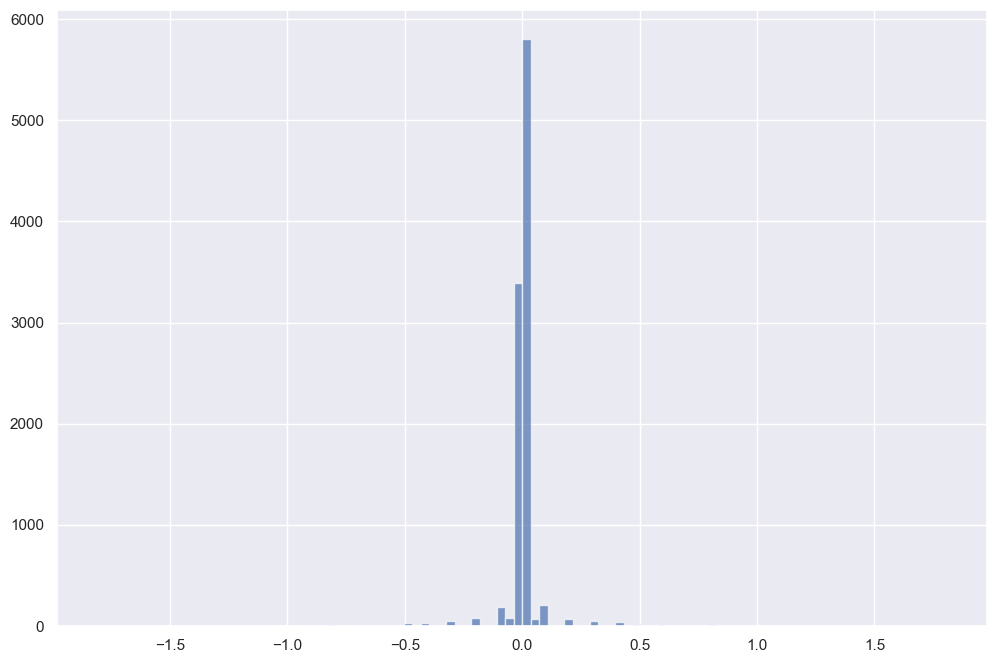

In [84]:
plt.figure(figsize=(12,8))
plt.hist(y1_test - Y_dt1, bins=100, alpha=0.7)
plt.show()

## - For data with area/city

In [85]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [86]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.6, 3.7, 4. , 3.1, 3.3, 3.7, 4.5, 2.9, 4. , 2.6, 3.6, 3.7, 3.5,
       3.6, 3.7, 3.5, 3.4, 3.4, 3.4, 4.2, 3.8, 3.9, 3.7, 3.7, 3.2, 3.9,
       3.6, 4. , 3.9, 3.7, 3.6, 3.7, 4.2, 3.7, 3.2, 4.4, 3.6, 3. , 3.5,
       3.9, 3.7, 2.7, 3.8, 3.7, 4.4, 3.7, 3.7, 3.7, 3.1, 4. , 3.8, 3.4,
       3.6, 3.7, 4.1, 3.6, 3.5, 3.7, 3.5, 3.3, 3.3, 3.6, 3.1, 3.5, 3.7,
       3.6, 3.7, 4.4, 3.8, 3.3, 3.7, 3.7, 3.8, 3.7, 2.8, 3.8, 3.7, 3.4,
       4. , 3.3, 3.9, 4.2, 4. , 4. , 3.7, 3.5, 3.7, 4.3, 4.4, 3.8, 3.8,
       4.6, 3.5, 4.1, 3.7, 3.7, 3.7, 3.7, 3.8, 3.7])

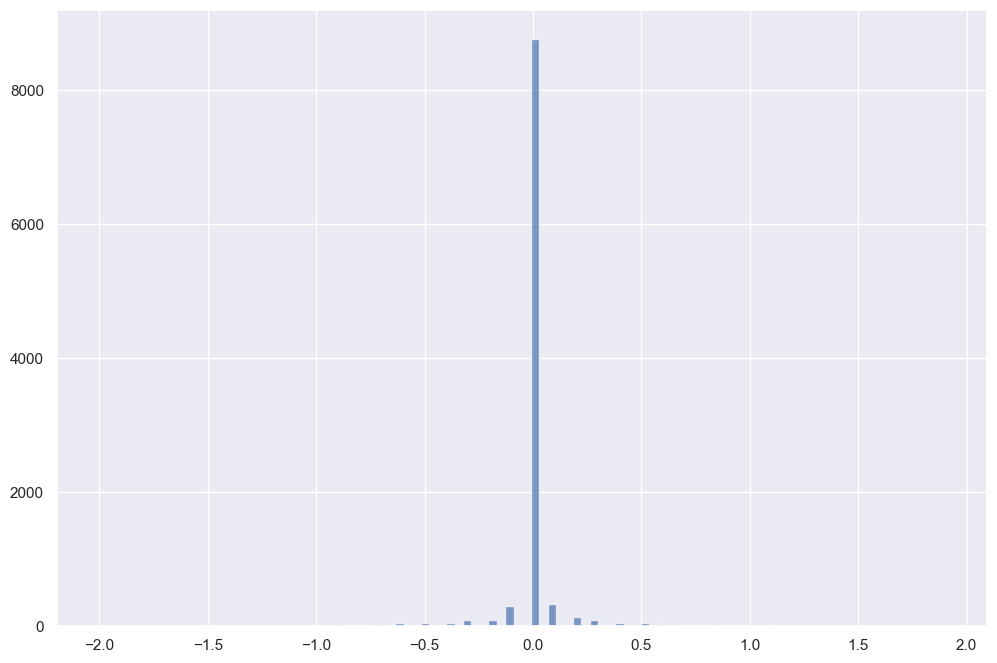

In [87]:
plt.figure(figsize=(12,8))
plt.hist(y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

# Model Evaluation

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression Model

## - for data with location

In [89]:
mae =  mean_absolute_error(y1_test, Y_lr1)
mse = mean_squared_error(y1_test, Y_lr1)
r2score = r2_score(y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.3562463945289235
Coefficient of Determination for test data :  0.36287852229616124
Mean Absolute Error :  0.24070856163530838
Mean Squared Error :  0.10069421959861737
Root Mean Squared Error :  0.3173235251263564
R2 Score :  0.36287852229616124


## - for data with area

In [90]:
mae =  mean_absolute_error(y2_test, Y_lr2)
mse = mean_squared_error(y2_test, Y_lr2)
r2score = r2_score(y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.34309497935416655
Coefficient of Determination for test data :  0.34791620663670986
Mean Absolute Error :  0.24216788600609918
Mean Squared Error :  0.10158188498576089
Root Mean Squared Error :  0.31871913181633904
R2 Score :  0.34791620663670986


## Random Forest

## - for data with location

In [91]:
mae =  mean_absolute_error(y1_test, Y_rf1)
mse = mean_squared_error(y1_test, Y_rf1)
r2score = r2_score(y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9903457257579973
Coefficient of Determination for test data :  0.9366181869239555
Mean Absolute Error :  0.03674285127196768
Mean Squared Error :  0.01001721402869494
Root Mean Squared Error :  0.10008603313497313
R2 Score :  0.9366181869239555


## - for data with area

In [92]:
mae =  mean_absolute_error(y2_test, Y_rf2)
mse = mean_squared_error(y2_test, Y_rf2)
r2score = r2_score(y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9844100877052834
Coefficient of Determination for test data :  0.8929030018929531
Mean Absolute Error :  0.05760451640114323
Mean Squared Error :  0.01668361498131774
Root Mean Squared Error :  0.1291650687350018
R2 Score :  0.8929030018929531


# Decision Tree Regression

## - for data with location

In [93]:
mae =  mean_absolute_error(y1_test, Y_dt1)
mse = mean_squared_error(y1_test, Y_dt1)
r2score = r2_score(y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9987549063699236
Coefficient of Determination for test data :  0.9087788935151069
Mean Absolute Error :  0.026606694245334572
Mean Squared Error :  0.014417090695988856
Root Mean Squared Error :  0.12007119011648404
R2 Score :  0.9087788935151069


## - for data with area

In [94]:
mae =  mean_absolute_error(y2_test, Y_dt2)
mse = mean_squared_error(y2_test, Y_dt2)
r2score = r2_score(y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9992416758775643
Coefficient of Determination for test data :  0.842079790455353
Mean Absolute Error :  0.0428286901271638
Mean Squared Error :  0.024600876031823614
Root Mean Squared Error :  0.15684666407617223
R2 Score :  0.842079790455353


## Conclusion

- Three models were trained - Multiple Linear Regression, Random Forest Regression and Decision Tree Regression.
- For prediction, Random Forest Regression is the best model.
- We are using <b>Random Forest Regression Model for data with location</b> to predict
- The <b>Accuracy</b> score for this model is <b>91%</b>.

In [95]:
logging.info("Model_Selection")

# Latency After Reloading 

In [96]:
import time

def measure_latency(model, data):
    start_time = time.time()
    for _ in range(100):  # Measure latency over 100 predictions
        model.predict(data)
    end_time = time.time()
    
    total_time = end_time - start_time
    average_latency = total_time / 100
    return average_latency

# Measure latency for a batch of inputs
single_input_X1 = X1_test[0].reshape(1, -1)
average_latency_X1 = measure_latency(dt1, single_input_X1)
print(f'Average latency for a single input from X1_test: {average_latency_X1:.6f} seconds')

single_input_X2 = X2_test[0].reshape(1, -1)
average_latency_X2 = measure_latency(dt2, single_input_X2)
print(f'Average latency for a single input from X2_test: {average_latency_X2:.6f} seconds')


Average latency for a single input from X1_test: 0.000373 seconds
Average latency for a single input from X2_test: 0.000501 seconds


# Saving the model

In [97]:
import pickle

In [98]:
with open('rate_predict.pkl', 'wb') as file:
    pickle.dump(rf1, file)

In [99]:
def measure_latency(model, data):
    start_time = time.time()
    for _ in range(100):  # Measure latency over 100 predictions
        model.predict(data)
    end_time = time.time()
    
    total_time = end_time - start_time
    average_latency = total_time / 100
    return average_latency

# Measure latency for a batch of inputs
single_input_X1 = X1_test[0].reshape(1, -1)
average_latency_X1 = measure_latency(dt1, single_input_X1)
print(f'Average latency for a single input from X1_test: {average_latency_X1:.6f} seconds')

single_input_X2 = X2_test[0].reshape(1, -1)
average_latency_X2 = measure_latency(dt2, single_input_X2)
print(f'Average latency for a single input from X2_test: {average_latency_X2:.6f} seconds')



Average latency for a single input from X1_test: 0.000364 seconds
Average latency for a single input from X2_test: 0.000183 seconds
